In [1]:
from ollama_help import check_ollama, check_models
from utils import load_json

if not check_ollama():
    print("Ollama não está instalado ou não está conectado.")
    exit()

questoes = load_json("./questoes/questoes.json")


In [2]:
# Questões de Texto

text_models = ["phi4", "llava", "deepseek-r1", "llama3.2", "gemma2", "mistral"]
avaliable_text_models = list(check_models(text_models))

text_questions   = list(filter(lambda x : x["type"] == "only-text", questoes))

print(f"Total de {len(text_questions)} questões apenas texto")

✅ phi4 disponível
✅ llava disponível
✅ deepseek-r1 disponível
✅ llama3.2 disponível
✅ gemma2 disponível
✅ mistral disponível
Total de 1608 questões apenas texto


In [27]:
from itertools import product
from IPython.display import display
def gen_modelos_str(questions, primary_models, secundary_models=None):
    target = primary_models
    display(target)
    if secundary_models is not None:
        target = list(map(lambda x : f"{x[0]}+{x[1]}", product(secundary_models, primary_models)))
    target = list(map(lambda x : f"{x[0]}-{x[1]}", product(questions, target)))
    display(target)
    return target

def filter_predictions(models):
    all_predictions = load_json("./predict_data/local_predictions.json")
    return {
        pred_key : pred for pred_key, pred in all_predictions.items()
        if pred_key in models
    }
    
def load_predictions(questions, primary_models, secundary_models=None):
    modelos = gen_modelos_str(questions, primary_models, secundary_models)
    # display(modelos)
    return filter_predictions(modelos)
    

In [3]:
# Teste das Questões no Ollama

from ollama_help.runner import test_ollama_models
from utils import test_table, plots, new_test_table
from IPython.display import display

test_ollama_models(
    questions = text_questions,
    primary_models = sorted(avaliable_text_models, key=lambda x : len(x)),
    #predict_file ="./predict_data/text_predictions.json",
)



KeyboardInterrupt: 

In [4]:
import random

new_models = ["qwen2-math:1.5b", "qwen2-math:7b", "phi3.5", "mistral-small", "mathstral"]
new_models_avaliable = list(check_models(new_models))

random.seed(42)

example_context_questions = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", text_questions)), 25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", text_questions)),25))
)



✅ qwen2-math:1.5b disponível
✅ qwen2-math:7b disponível
✅ phi3.5 disponível
✅ mistral-small disponível
✅ mathstral disponível


In [5]:
test_ollama_models(
    models = sorted(new_models_avaliable, key=lambda x : len(x)),
    questions = example_context_questions,
    predict_file ="./predict_data/new_text_predictions.json",
)

test_table("./predict_data/new_text_predictions.json", len(example_context_questions))

,Model,Finish,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,phi3.5,100,16,83,1,0.160,803.697748,0.0,8.036977,127.324694,0.285188
1,qwen2-math:7b,100,37,0,63,0.370,40.428395,0.0,0.404284,4.432784,0.156412
2,qwen2-math:1.5b,100,26,3,71,0.260,275.699232,0.0,2.756992,6.401523,0.205145
3,mistral-small,100,78,4,18,0.780,2661.268912,0.0,26.612689,251.289925,1.019627
4,mathstral,100,56,9,35,0.560,638.638765,0.0,6.386388,23.443004,0.253637
5,TOTAL,500,213,99,188,0.426,0.000000,-0.0,0.000000,251.289925,0.156412


In [6]:
qwen_models = ["qwen2.5:14b", "qwen2.5:7b", "qwen2.5:1.5b"]

qwen_models_avaliable = list(check_models(qwen_models))

test_ollama_models(
    models = qwen_models,
    questions = example_context_questions,
    predict_file ="./predict_data/qwen_context_predictions.json",
)

test_table("./predict_data/qwen_context_predictions.json", len(example_context_questions))


✅ qwen2.5:14b disponível
✅ qwen2.5:7b disponível
✅ qwen2.5:1.5b disponível


,Model,Finish,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,qwen2.5:14b,100,64,2,34,0.640000,72.324621,0.0,0.723246,4.782813,0.295107
1,qwen2.5:7b,100,64,0,36,0.640000,33.263486,0.0,0.332635,4.680475,0.150546
2,qwen2.5:1.5b,100,42,0,58,0.420000,15.775303,0.0,0.157753,2.123976,0.068912
3,TOTAL,300,170,2,128,0.566667,0.000000,-0.0,0.000000,4.782813,0.068912


In [1]:
from ollama_help import check_ollama, check_models
from utils import load_json
from utils import test_table, plots
from ollama_help.runner import test_ollama_models
import random

random.seed(42)

if not check_ollama():
    print("Ollama não está instalado ou não está conectado.")
    exit(1)

questoes = load_json("./questoes/questoes.json")
text_questions   = list(filter(lambda x : x["type"] == "only-text", questoes))

example_context_questions = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", text_questions)), 25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", text_questions)),25)) +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", text_questions)),25))
)

reasoning_models = ["openthinker", "mistral-nemo", "deepscaler",  "smallthinker"]

# o smallthinker frequentemente travou a execução por isso tive que implementar o timeout

avaliabel_reasoning_models = list(check_models(reasoning_models))

print("Iniciando os testes")

test_ollama_models(
    example_context_questions,
    avaliabel_reasoning_models,
    timeout = 120
)


,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,mistral-nemo,7.1,100 (100.0%),65,2,33,0,0.6500,04:34,0.00,2.75,14.25,0.22
1,openthinker,4.7,100 (100.0%),60,15,25,0,0.6000,01:24:44,0.00,50.85,09:02,9.70
2,smallthinker,3.6,100 (100.0%),53,11,25,11,0.5300,18:20,0.00,11.00,27.32,4.87
3,deepscaler,3.6,100 (100.0%),29,11,60,0,0.2900,43:28,0.00,26.08,05:24,3.82
4,TOTAL,19.0,400 (100.0%),207,39,143,11,0.5175,02:31:07,ND,22.67,09:02,0.22


Teste: 100%|██████████| 21/21 [22:39<00:00, 64.73s/it]


{'ok': [{'question': {'id': 2017031,
    'year': 2017,
    'index': 31,
    'discipline': 'linguagens',
    'context': 'No esporte-participação ou esporte popular, a manifestação ocorre no princípio do prazer lúdico, que tem como finalidade o bem-estar social dos seus praticantes. Está associado intimamente com o lazer e o tempo livre e ocorre em espaços não comprometidos com o tempo e fora das obrigações da vida diária. Tem como propósitos a descontração, a diversão, o desenvolvimento pessoal e o relacionamento com as pessoas. Pode-se afirmar que o esporte-participação, por ser a dimensão social do esporte mais inter-relacionada com os caminhos democráticos, equilibra o quadro de desigualdades de oportunidades esportivas encontrado na dimensão esporte-performance. Enquanto o esporte-performance só permite sucesso aos talentos ou àqueles que tiveram condições, o esporte-participação favorece o prazer a todos que dele desejarem tomar parte.\n\nGODTSFRIEDT, J. **Esporte e sua relação com

In [4]:
visions_models = ["llava", "llama3.2-vision", "llava-llama3", "minicpm-v","moondream", "llava-phi3"]
available_visions_models = list(check_models(visions_models))

context_questions = list(filter(lambda x : x["type"] == "context-image", questoes))

print(f"Total de {len(context_questions)} questões com imagem de contexto")

✅ llava disponível
✅ llama3.2-vision disponível
✅ llava-llama3 disponível
✅ minicpm-v disponível
✅ moondream disponível
✅ llava-phi3 disponível
Total de 795 questões com imagem de contexto


In [5]:
test_result_context_vision = test_ollama_models(
    models = sorted(available_visions_models, key=lambda x : len(x)),
    questions = context_questions,
    predict_file ="./predict_data/correct_context.json",
)

# Error ao gerar resposta para a pergunta 2016076 do modelo minicpm-v: POST predict: Post "http://127.0.0.1:50544/completion": read tcp 127.0.0.1:50546->127.0.0.1:50544: wsarecv: An existing connection was forcibly closed by the remote host. (status code: 500)

test_table("./predict_data/correct_context.json", len(context_questions))


Error ao gerar resposta para a pergunta 2016076 do modelo minicpm-v: POST predict: Post "http://127.0.0.1:59918/completion": read tcp 127.0.0.1:60058->127.0.0.1:59918: wsarecv: An existing connection was forcibly closed by the remote host. (status code: 500)
Error ao gerar resposta para a pergunta 2009002 do modelo llama3.2-vision: error processing image (status code: 500)
Error ao gerar resposta para a pergunta 2009025 do modelo llama3.2-vision: error processing image (status code: 500)
Error ao gerar resposta para a pergunta 2010101 do modelo llama3.2-vision: error processing image (status code: 500)


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llava,795 (100%),154,179,462,19%,20:49,0.00,1.57,19.91,0.28
1,minicpm-v,794 (100%),233,64,497,29%,24:16,1.83,1.83,14.82,0.30
2,moondream,795 (100%),8,770,17,1%,04:57,0.00,0.37,4.51,0.10
3,llava-phi3,795 (100%),182,132,481,23%,14:51,0.00,1.12,20.50,0.18
4,llava-llama3,795 (100%),91,413,291,11%,10:08,0.00,0.77,6.72,0.22
5,llama3.2-vision,792 (100%),283,22,487,36%,02:48:39,38.33,12.78,03:53,0.64
6,TOTAL,4766 (100%),951,1580,2235,20%,04:03:43,ND,3.07,03:53,0.10


In [1]:
from ollama_help.runner import test_ollama_models
import utils
from ollama_help import check_ollama, check_models
from utils import load_json
from utils import test_table, plots
import random

random.seed(42)

if not check_ollama():
    print("Ollama não está instalado ou não está conectado.")
    exit(1)

questoes = load_json("./questoes/questoes.json")

best_text_models = ["mistral-small", "qwen2.5:7b", "mistral-nemo", "gemma2", "mistral", "phi4"]
random.seed(42)

# Coletando 25 Questões aleatórias de cada uma das disciplinas
context_questions = list(filter(lambda x : x["type"] == "context-image", questoes))

example_context_questions = (
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-humanas", context_questions)), 25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "ciencias-natureza", context_questions)),25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "linguagens", context_questions)),25))[:10] +
    list(random.sample(list(filter(lambda x : x["discipline"] == "matematica", context_questions)),25))[:10]
)

visions_models = ["llava", "llama3.2-vision", "llava-llama3", "minicpm-v","moondream", "llava-phi3"]

test_ollama_models(
    questions= example_context_questions,
    primary_models = sorted(best_text_models),
    secundary_models= sorted(visions_models),
    timeout = 300 # 5 minutos
)


multi_models_context_table = test_table(
    questions=example_context_questions,
    models=utils.gen_modelos_str(best_text_models, secundary_models=visions_models)
)

,Model,Size,Finish,OK,Null,Err,Tout,Acc,Ttot,TTout,Tle,Tavg,Tmax,Tmin
0,minicpm-v+phi4,14.6,40 (100.0%),27,0,13,0,0.67500,15:06,40:06,0.00,22.66,40.36,9.49
1,llama3.2-vision+phi4,17.0,40 (100.0%),24,0,16,0,0.60000,23:29,33:29,0.00,35.25,55.78,11.77
2,llama3.2-vision+mistral-small,21.9,40 (100.0%),22,1,16,1,0.55000,53:05,01:03:05,0.00,01:19,02:50,41.08
3,minicpm-v+gemma2,10.9,40 (100.0%),22,0,18,0,0.55000,07:27,27:27,0.00,11.18,23.79,7.86
4,moondream+phi4,10.8,40 (100.0%),22,0,18,0,0.55000,10:58,40:58,0.00,16.45,31.81,8.58
5,moondream+mistral-small,15.7,40 (100.0%),21,0,19,0,0.52500,34:24,01:04:24,0.00,51.62,02:01,12.53
6,llama3.2-vision+mistral-nemo,15.0,40 (100.0%),21,0,19,0,0.52500,24:27,24:27,0.00,36.69,01:00,21.29
7,llava+phi4,13.8,40 (100.0%),21,0,19,0,0.52500,11:53,26:53,0.00,17.84,38.28,8.34
8,llava-phi3+mistral-small,16.9,40 (100.0%),21,0,19,0,0.52500,35:05,55:05,0.00,52.65,02:14,14.81
9,moondream+gemma2,7.1,40 (100.0%),21,0,19,0,0.52500,04:10,34:10,0.00,6.27,11.62,4.95


Teste: 0it [00:00, ?it/s]


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 

C:\Users\rubenslima\AppData\Local\Temp\ipykernel_31768\1880186075.py:11: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
C:\Users\rubenslima\AppData\Local\Temp\ipykernel_31768\1880186075.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
C:\Users\rubenslima\AppData\Local\Temp\ipykernel_31768\1880186075.py:27: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
C:\Users\rubenslima\AppData\Local\Temp\ipykernel_31768\1880186075.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ).show()
C:\Users\rubenslima\AppData\Local\Temp\ipykernel_31768\1880186075.py:37: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  utils.plots.correlation(multi_models_context_table).show()
C:\Users\rubenslima\AppData\Local\Temp\ipykernel_31768\1880186075.py:38: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  utils.plots

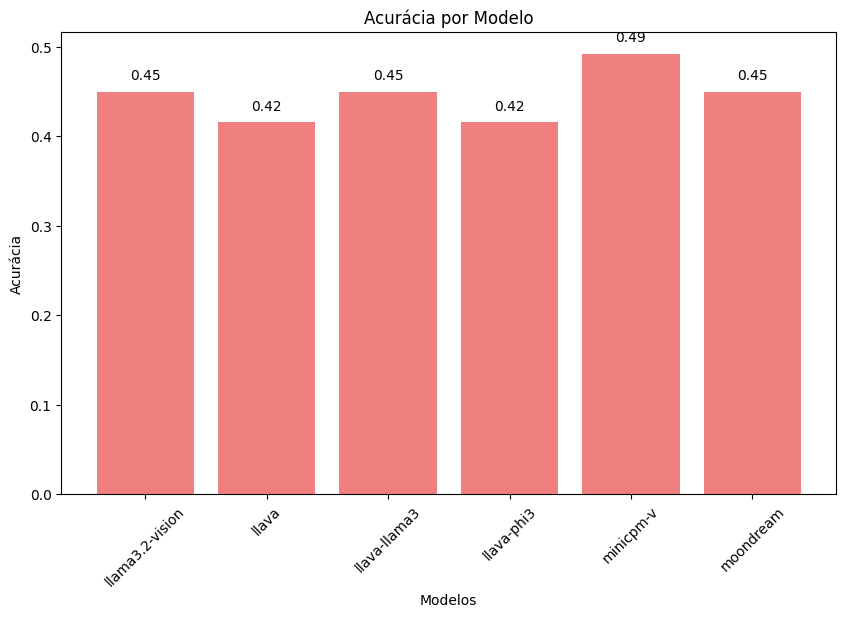

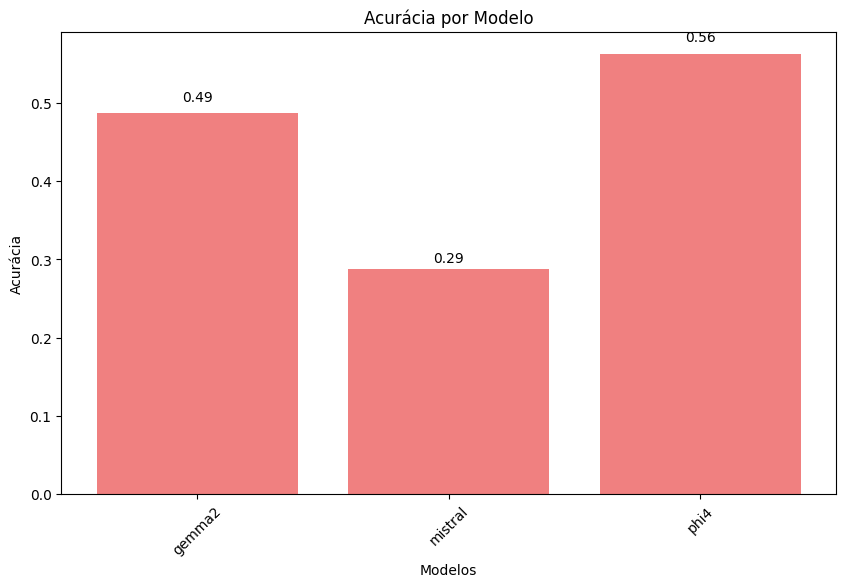

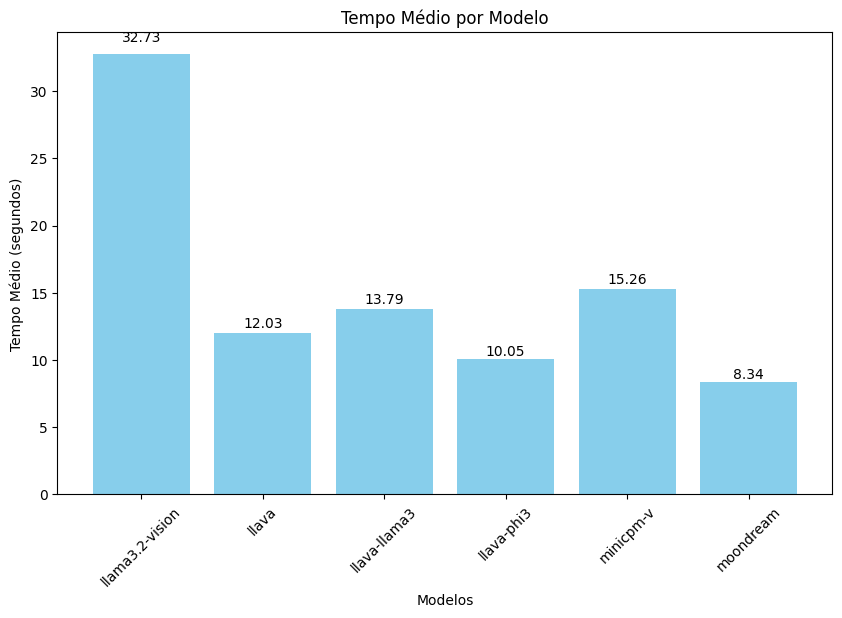

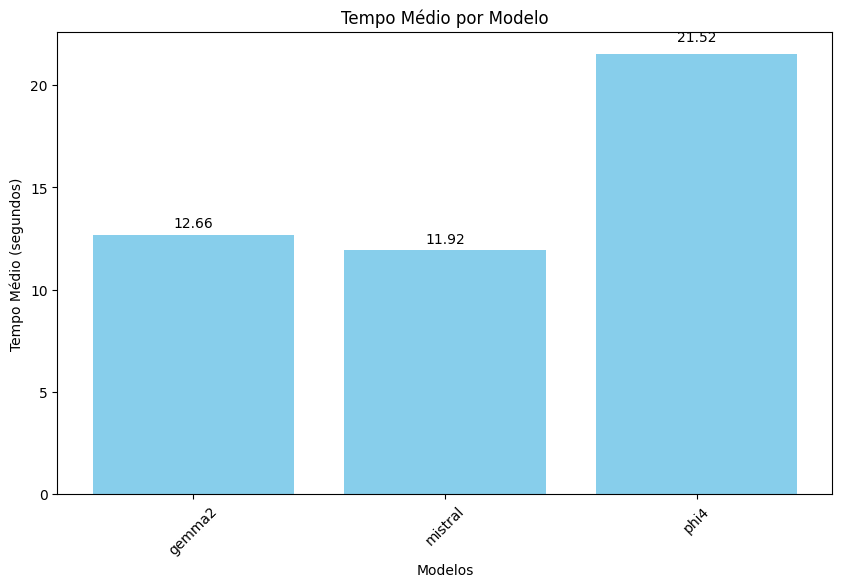

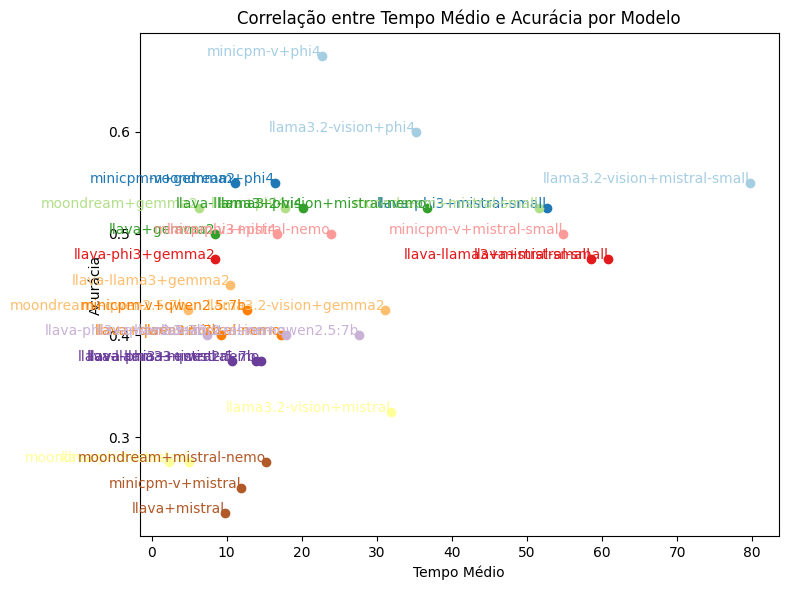

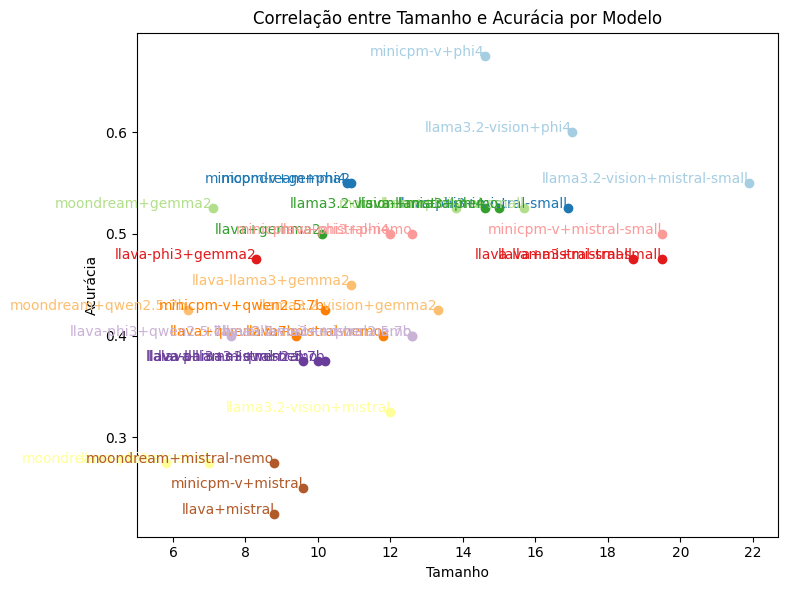

In [3]:
import utils.plots

best_text_models = ["qwen2.5:7b", "mistral-nemo", "gemma2", "mistral", "phi4"]

utils.plots.multi_model_performance(
    questions=example_context_questions,
    vision_models=visions_models,
    text_models=best_text_models,
    group='model_vision',
    y_axis='accuracy'
).show()

utils.plots.multi_model_performance(
    questions=example_context_questions,
    vision_models=visions_models,
    text_models=best_text_models,
    group='model_text',
    y_axis='accuracy'
).show()

utils.plots.multi_model_performance(
    questions=example_context_questions,
    vision_models=visions_models,
    text_models=best_text_models,
    group='model_vision',
    y_axis='time-avg'
).show()

utils.plots.multi_model_performance(
    questions=example_context_questions,
    vision_models=visions_models,
    text_models=best_text_models,
    group='model_text',
    y_axis='time-avg'
).show()

utils.plots.correlation(multi_models_context_table).show()
utils.plots.correlation(multi_models_context_table, x='Size').show()

In [7]:
# Questões com alternativas com Imagem (Apenas Visão)

answer_questions = list(filter(lambda x :x['type'] == 'answer-image', questoes))

test_ollama_models(
    models = ["moondream", "minicpm-v", "llava-phi3"], # o llama3.2-vision não suporta mais de uma imagem
    questions = answer_questions,
    predict_file = "./predict_data/answ-vision.json"
)

test_table("./predict_data/answ-vision.json", len(answer_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,moondream,84 (138%),0,84,0,0%,01:38,ND,1.18,4.65,1.02
1,minicpm-v,61 (100%),6,13,42,10%,01:58,0.00,1.94,7.37,1.41
2,llava-phi3,61 (100%),0,61,0,0%,03:06,0.00,3.06,11.77,2.12
3,TOTAL,206 (113%),6,158,42,3%,06:43,ND,1.96,11.77,1.02


In [8]:
# Questões com alternativas com Imagem (Multi Modelos)
from ollama_help.runner import test_ollama_multi_models

answer_questions = list(filter(lambda x :x['type'] == 'answer-image', questoes))

test_ollama_multi_models(
    text_models = ['phi4', 'gemma2'],
    vision_models= ["llama3.2-vision", "moondream", "minicpm-v"],
    questions=answer_questions,
    predict_file="./predict_data/answ-multi.json"
)

test_table("./predict_data/answ-multi.json",len(answer_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+phi4,61 (100%),9,8,44,15%,11:17,0.00,11.10,26.76,2.26
1,llama3.2-vision+gemma2,61 (100%),11,3,47,18%,01:41,0.00,1.67,9.11,0.27
2,moondream+phi4,61 (100%),10,10,41,16%,10:52,0.00,10.69,25.77,2.56
3,moondream+gemma2,61 (100%),11,5,45,18%,01:57,0.00,1.93,8.81,0.27
4,minicpm-v+phi4,61 (100%),11,13,37,18%,10:31,0.00,10.35,25.40,2.12
5,minicpm-v+gemma2,61 (100%),14,4,43,23%,01:45,0.00,1.72,8.52,0.27
6,TOTAL,366 (100%),66,43,257,18%,38:05,ND,6.24,26.76,0.27


In [ ]:
# Questões com imagens no contexto e nas alternativas (Vision Models)


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,moondream,65 (100%),0,65,0,0%,01:16,0.00,1.18,1.38,1.07
1,minicpm-v,65 (100%),4,17,44,6%,03:41,0.00,3.41,8.49,1.51
2,llava-phi3,65 (100%),0,65,0,0%,04:22,0.00,4.04,9.37,2.66
3,TOTAL,195 (100%),4,147,44,2%,09:21,ND,2.88,9.37,1.07


In [ ]:

full_image_questions = list(filter(lambda x :x['type'] == 'full-image', questoes))


In [ ]:

test_ollama_models(
    models = ["moondream", "minicpm-v", "llava-phi3"],
    questions = full_image_questions,
    predict_file = "./predict_data/full-vision.json"
)

test_table("./predict_data/full-vision.json", len(full_image_questions))

In [10]:
# Questoes com imagem no contexto e nas alternativas (Multi Modelos)
from ollama_help.runner import test_ollama_multi_models

full_image_questions = list(filter(lambda x :x['type'] == 'full-image', questoes))


test_result_full_image_multi = test_ollama_multi_models(
    text_models = ['phi4', 'gemma2'],
    vision_models= ["llama3.2-vision", "moondream", "minicpm-v"],
    questions=full_image_questions,
    predict_file="./predict_data/full-multi.json"
)

test_table("./predict_data/full-multi.json",len(full_image_questions))

,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+phi4,64 (98%),9,1,54,14%,02:55:23,02:44,02:44,05:13,01:25
1,llama3.2-vision+gemma2,64 (98%),10,4,50,16%,02:33:31,02:23,02:23,04:22,01:10
2,moondream+phi4,65 (100%),14,1,50,22%,24:01,0.00,22.18,38.89,9.37
3,moondream+gemma2,65 (100%),9,4,52,14%,11:07,0.00,10.26,20.03,7.26
4,minicpm-v+phi4,65 (100%),10,0,55,15%,42:44,0.00,39.45,01:28,15.76
5,minicpm-v+gemma2,65 (100%),9,1,55,14%,28:55,0.00,26.70,54.12,13.22
6,TOTAL,388 (99%),61,11,316,16%,07:15:44,ND,01:07,05:13,7.26


,Model,Finsh,OK,Null,Err,Acc,Ttot,Tle,Tavg,Tmax,Tmin
0,llama3.2-vision+phi4,64 (98%),9,1,54,14%,02:55:23,02:44,02:44,05:13,01:25
1,llama3.2-vision+gemma2,64 (98%),10,4,50,16%,02:33:31,02:23,02:23,04:22,01:10
2,moondream+phi4,65 (100%),14,1,50,22%,24:01,0.00,22.18,38.89,9.37
3,moondream+gemma2,65 (100%),9,4,52,14%,11:07,0.00,10.26,20.03,7.26
4,minicpm-v+phi4,65 (100%),10,0,55,15%,42:44,0.00,39.45,01:28,15.76
5,minicpm-v+gemma2,65 (100%),9,1,55,14%,28:55,0.00,26.70,54.12,13.22
6,TOTAL,388 (99%),61,11,316,16%,07:15:44,ND,01:07,05:13,7.26
